In [10]:
import torch
from torch import nn
from torch.autograd import Variable
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pyplot as plt

In [4]:
train_dataset = dsets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = dsets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [6]:
batch_size = 100
n_iters = 3000
epochs = n_iters / (len(train_dataset) / batch_size)
lr_rate = 0.1

In [7]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [8]:
len(train_dataset), len(test_dataset)

(60000, 10000)

In [31]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

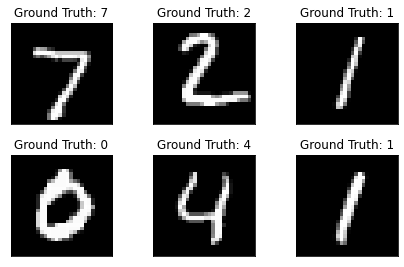

In [32]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])


In [39]:
input_size = 784
hidden_sizes = 128
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes,output_size),
                      nn.Softmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
  (3): Softmax(dim=1)
)


In [40]:
criterion = torch.nn.CrossEntropyLoss()

In [42]:
optimizer = torch.optim.Adam(model.parameters(), lr=lr_rate)

In [43]:
iter = 0
for epoch in range(int(epochs)):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, 28 * 28))
        labels = Variable(labels)

        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        iter+=1
        if iter%100==0:
            
            correct = 0
            total = 0
            for images, labels in test_loader:
                images = Variable(images.view(-1, 28*28))
                output = model(images)
                _, predicted = torch.max(output.data, 1)
                total+= labels.size(0)
                correct+= (predicted == labels).sum()
            accuracy = 100 * correct/total
            print("Iteration: {}. Loss: {}. Accuracy: {}.".format(iter, loss.item(), accuracy))

Iteration: 100. Loss: 1.7868554592132568. Accuracy: 82.58999633789062.
Iteration: 200. Loss: 1.6050126552581787. Accuracy: 89.80000305175781.
Iteration: 300. Loss: 1.5692050457000732. Accuracy: 91.26000213623047.
Iteration: 400. Loss: 1.5484977960586548. Accuracy: 91.63999938964844.
Iteration: 500. Loss: 1.5638240575790405. Accuracy: 92.12000274658203.
Iteration: 600. Loss: 1.5433692932128906. Accuracy: 92.80999755859375.
Iteration: 700. Loss: 1.573258638381958. Accuracy: 92.66999816894531.
Iteration: 800. Loss: 1.525323510169983. Accuracy: 93.04000091552734.
Iteration: 900. Loss: 1.5467991828918457. Accuracy: 93.06999969482422.
Iteration: 1000. Loss: 1.5504364967346191. Accuracy: 93.52999877929688.
Iteration: 1100. Loss: 1.5452888011932373. Accuracy: 93.29000091552734.
Iteration: 1200. Loss: 1.5398266315460205. Accuracy: 93.95999908447266.
Iteration: 1300. Loss: 1.5337135791778564. Accuracy: 93.72000122070312.
Iteration: 1400. Loss: 1.520405888557434. Accuracy: 94.11000061035156.
Iter